In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def Kalman_predict(z, A, B, H, Q, R, x, P, u=0, dt=0.01):
    # Predict
    x_dot = A @ x + B * u
    P_dot = A @ P + P @ A.T + Q

    x_pred = x + x_dot*dt
    P_pred = P + P_dot*dt

    return x_pred, P_pred

def Kalman_update(z, A, B, H, Q, R, x, P, u=0, dt=0.01):
    # Update
    y = z - H @ x
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)
    x_update = x + K @ y
    P_update = P - K @ H @ P

    return x_update, P_update

In [90]:
# General variables
dt = 0.01
freq = 1/dt

total_time = 10
num_of_point = (int)(total_time*freq)

# System dynamics matrix
A = np.array([[0, 1],
              [-1, -0.0]])

# Control input matrix
B = np.array([[0],
              [1]])

# Observation matrix
H = np.array([[1, 0]])

# Process noise covariance
Q = np.array([[0.1, 0],
              [0, 2.0]])

# Measurement noise covariance
R = np.array([[5e-3]])
filter_std = 5e-3


# Initial state estimate
x = np.array([[0],  # initial position
              [0]])  # initial velocity

# Initial covariance estimate
P = np.eye(2)


# Simulated position measurements (noisy)
np.random.seed(42)
true_position = np.linspace(0, 10, num_of_point)
true_velocity = np.ones(num_of_point)

true_velocity[0] = 0
for i in range(1,num_of_point):
    t = i*dt
    true_velocity[i] = np.sin(1*t)+np.random.normal(0, 0.02, 1)
    true_position[i] = true_position[i-1]+dt*0.5*(true_velocity[i]+true_velocity[i-1])

measurements = true_position + np.random.normal(0, filter_std, num_of_point)

estimates = []

In [91]:
for z in measurements:
    x_pred, P_pred = Kalman_predict(z, A, B, H, Q, R, x, P, u=1)
    x, P = Kalman_update(z, A, B, H, Q, R, x_pred, P_pred)
    estimates.append(x.flatten())

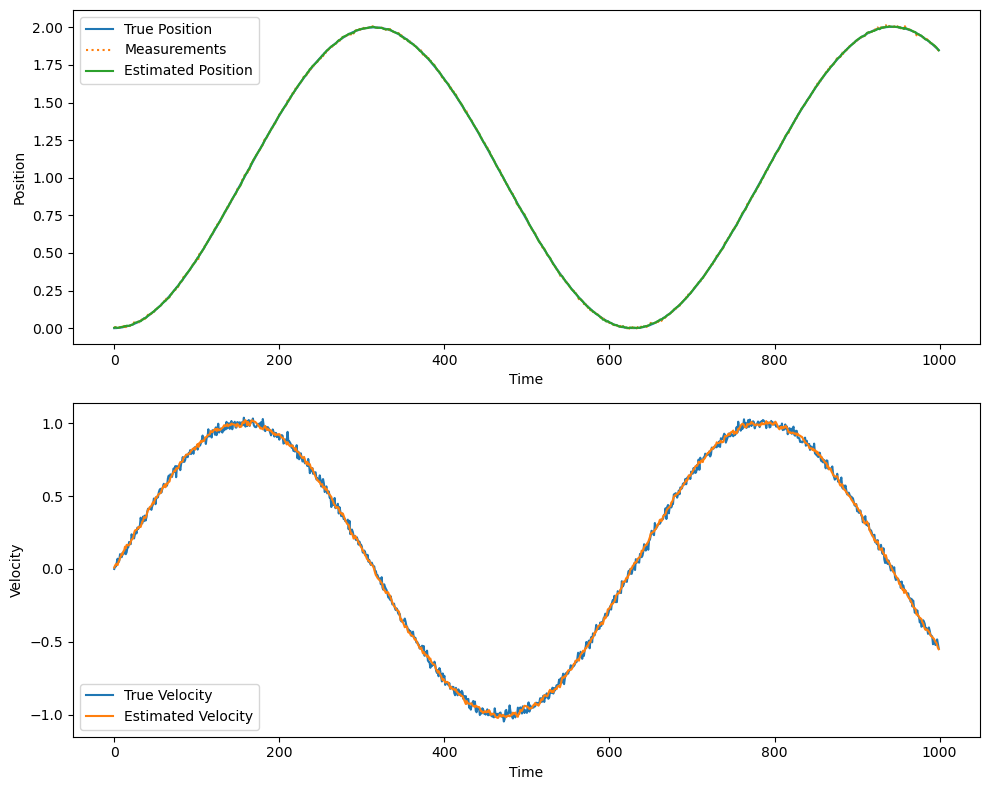

In [92]:
estimates = np.array(estimates)


# Plotting the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(true_position, label='True Position')
plt.plot(measurements, label='Measurements', linestyle='dotted')
plt.plot(estimates[:, 0], label='Estimated Position')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')


plt.subplot(2, 1, 2)
plt.plot(true_velocity, label='True Velocity')
plt.plot(estimates[:, 1], label='Estimated Velocity')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity')

plt.tight_layout()
plt.show()